In [38]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [40]:
apple_data = yf.download('AAPL',start = "2020-01-01",end = "2022-12-31")
meta_data = yf.download('META',start = "2020-01-01",end = "2022-12-31")
close = pd.DataFrame()
close['AAPL'] = apple_data['Close']
close['META'] = meta_data['Close']
close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,META
Date,,
2020-01-02 00:00:00-05:00,75.087502,209.779999
2020-01-03 00:00:00-05:00,74.357498,208.669998
2020-01-06 00:00:00-05:00,74.949997,212.600006
2020-01-07 00:00:00-05:00,74.597504,213.059998
2020-01-08 00:00:00-05:00,75.797501,215.220001
...,...,...
2022-12-23 00:00:00-05:00,131.860001,118.040001
2022-12-27 00:00:00-05:00,130.029999,116.879997
2022-12-28 00:00:00-05:00,126.040001,115.620003


In [41]:
#min-max normalization
close['AAPL_N'] = (close['AAPL'] - close['AAPL'].min())/(close['AAPL'].max()-close['AAPL'].min())
close['META_N'] = (close['META'] - close['META'].min())/(close['META'].max()-close['META'].min())
close

,AAPL,META,AAPL_N,META_N
Date,,,,
2020-01-02 00:00:00-05:00,75.087502,209.779999,0.150853,0.412146
2020-01-03 00:00:00-05:00,74.357498,208.669998,0.145055,0.408361
2020-01-06 00:00:00-05:00,74.949997,212.600006,0.149761,0.421762
2020-01-07 00:00:00-05:00,74.597504,213.059998,0.146961,0.423330
2020-01-08 00:00:00-05:00,75.797501,215.220001,0.156491,0.430695
...,...,...,...,...
2022-12-23 00:00:00-05:00,131.860001,118.040001,0.601723,0.099328
2022-12-27 00:00:00-05:00,130.029999,116.879997,0.587190,0.095373
2022-12-28 00:00:00-05:00,126.040001,115.620003,0.555503,0.091076


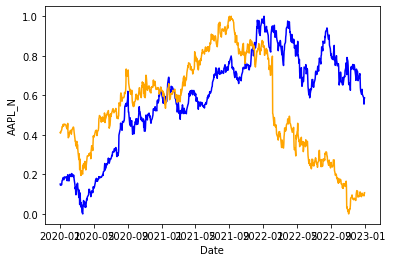

In [42]:
sns.lineplot(data = close, y = 'AAPL_N',x = 'Date',color = 'blue')
sns.lineplot(data = close, y = 'META_N',x = 'Date',color = 'orange')

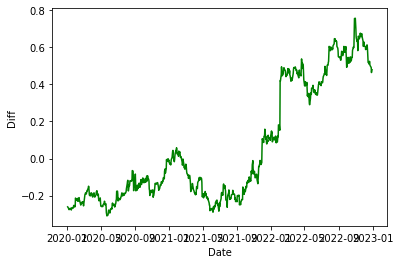

In [43]:
close['Diff'] = close['AAPL_N'] - close['META_N']
sns.lineplot(data = close, y = 'Diff',x = 'Date',color = 'green')

In [44]:
#Then, with selected pairs, 
#if the difference between the price of elements in a pair diverged by more than a threshold(ex. 2 standard deviations) 
#the positions are opened
SD = close['Diff'].std()
k = 0.75
threshold = k * SD
threshold

0.2366837939043983

In [46]:
conditions = [
    (close['Diff'] > threshold),
    (close['Diff'] < - threshold),
    (close['Diff'] < threshold) & (close['Diff'] > - threshold)
    ]
values = [ -1, 1, 0]
close['Signal'] = np.select(conditions, values)


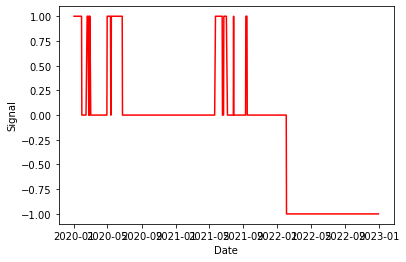

In [47]:
sns.lineplot(data = close, y = 'Signal',x = 'Date',color = 'red')

In [48]:
#long AAPL short META
close.head()

,AAPL,META,AAPL_N,META_N,Diff,Signal
Date,,,,,,
2020-01-02 00:00:00-05:00,75.087502,209.779999,0.150853,0.412146,-0.261293,1
2020-01-03 00:00:00-05:00,74.357498,208.669998,0.145055,0.408361,-0.263306,1
2020-01-06 00:00:00-05:00,74.949997,212.600006,0.149761,0.421762,-0.272001,1
2020-01-07 00:00:00-05:00,74.597504,213.059998,0.146961,0.423330,-0.276369,1
2020-01-08 00:00:00-05:00,75.797501,215.220001,0.156491,0.430695,-0.274204,1


In [52]:
ret = 0
close = close.reset_index()
for index, row in close.iterrows():
    if(row['Signal'] == 1):
      ret = ret - row['AAPL'] + row['META']
    if(row['Signal'] == -1):
      ret = ret + row['AAPL'] - row['META']
ret

11958.794998168945

In [67]:
apple_data2 = yf.download('AAPL',start = "2019-06-15",end = "2022-12-31")
meta_data2 = yf.download('META',start = "2019-06-15",end = "2022-12-31")
close2 = pd.DataFrame()
close2['AAPL'] = apple_data2['Close']
close2['META'] = meta_data2['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [81]:
close2['AAPL_Avg'] = close2['AAPL'].rolling(140).mean()
close2['META_Avg'] = close2['META'].rolling(140).mean()

In [82]:
close2.dropna()

,AAPL,META,AAPL_Avg,META_Avg
Date,,,,
2020-01-03 00:00:00-05:00,74.357498,208.669998,57.911804,191.975857
2020-01-06 00:00:00-05:00,74.949997,212.600006,58.100928,192.144357
2020-01-07 00:00:00-05:00,74.597504,213.059998,58.279393,192.320000
2020-01-08 00:00:00-05:00,75.797501,215.220001,58.467464,192.518143
2020-01-09 00:00:00-05:00,77.407501,218.300003,58.664196,192.723643
...,...,...,...,...
2022-12-23 00:00:00-05:00,131.860001,118.040001,149.121071,144.062857
2022-12-27 00:00:00-05:00,130.029999,116.879997,148.987642,143.500215
2022-12-28 00:00:00-05:00,126.040001,115.620003,148.831071,142.921500


In [87]:
condition = [
    (close2['AAPL'] > close2['AAPL_Avg']),
    (close2['AAPL'] < close2['AAPL_Avg'])
  ]
value = [-1, 1]
close2['AAPL_pos'] = np.select(condition, value)

In [88]:
condition = [
    (close2['META'] > close2['META_Avg']),
    (close2['META'] < close2['META_Avg'])
  ]
value = [-1, 1]
close2['META_pos'] = np.select(condition, value)

In [91]:
close2 = close2.dropna()

In [92]:
ret2 = 0
close2 = close2.reset_index()
for index, row in close2.iterrows():
    if(row['AAPL_pos'] == 1):
      ret2 = ret2 - row['AAPL']
    if(row['AAPL_pos'] == -1):
      ret2 = ret2 + row['AAPL']
    if(row['META_pos'] == 1):
      ret2 = ret2 - row['META']
    if(row['META_pos'] == -1):
      ret2 = ret2 + row['META']
ret2

70379.10758972168